In [ ]:
from google.colab import files
uploaded = files.upload()

Saving Airbnb_Open_Data.csv to Airbnb_Open_Data.csv


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import pandas as pd
df = pd.read_csv("Airbnb_Open_Data.csv")

<ipython-input-3-848b70c6daaa>:2: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Airbnb_Open_Data.csv")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   id                              102599 non-null  int64  
 1   NAME                            102349 non-null  object 
 2   host id                         102599 non-null  int64  
 3   host_identity_verified          102310 non-null  object 
 4   host name                       102193 non-null  object 
 5   neighbourhood group             102570 non-null  object 
 6   neighbourhood                   102583 non-null  object 
 7   lat                             102591 non-null  float64
 8   long                            102591 non-null  float64
 9   country                         102067 non-null  object 
 10  country code                    102468 non-null  object 
 11  instant_bookable                102494 non-null  object 
 12  cancellation_pol

In [ ]:
df['price'] = df['price'].replace('[\$,]', '', regex=True).astype(float)
df['service fee'] = df['service fee'].replace('[\$,]', '', regex=True).astype(float)

In [ ]:
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')

In [ ]:
df['price'].fillna(df['price'].median(), inplace=True)  # Fill missing prices with median
df['number of reviews'].fillna(0, inplace=True)  # Assume missing reviews as 0
df['availability 365'].fillna(0, inplace=True)  # Assume no availability if missing

<ipython-input-7-deb13a0ece03>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['price'].fillna(df['price'].median(), inplace=True)  # Fill missing prices with median
<ipython-input-7-deb13a0ece03>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

In [ ]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 102599 entries, 0 to 102598
Data columns (total 26 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   id                              102599 non-null  int64         
 1   NAME                            102349 non-null  object        
 2   host id                         102599 non-null  int64         
 3   host_identity_verified          102310 non-null  object        
 4   host name                       102193 non-null  object        
 5   neighbourhood group             102570 non-null  object        
 6   neighbourhood                   102583 non-null  object        
 7   lat                             102591 non-null  float64       
 8   long                            102591 non-null  float64       
 9   country                         102067 non-null  object        
 10  country code                    102468 non-null  object 

id                                              NAME      host id  \
0  1001254                Clean & quiet apt home by the park  80014485718   
1  1002102                             Skylit Midtown Castle  52335172823   
2  1002403               THE VILLAGE OF HARLEM....NEW YORK !  78829239556   
3  1002755                                               NaN  85098326012   
4  1003689  Entire Apt: Spacious Studio/Loft by central park  92037596077   

  host_identity_verified host name neighbourhood group neighbourhood  \
0            unconfirmed  Madaline            Brooklyn    Kensington   
1               verified     Jenna           Manhattan       Midtown   
2                    NaN     Elise           Manhattan        Harlem   
3            unconfirmed     Garry            Brooklyn  Clinton Hill   
4               verified    Lyndon           Manhattan   East Harlem   

        lat      long        country  ... service fee minimum nights  \
0  40.64749 -73.97237  United States  ...       193.0           10.0   
1  40.75362 -73.98377  United States  ...        28.0           30.0   
2  40.80902 -73.94190  United States  ...       124.0            3.0   
3  40.68514 -73.95976  United States  ...        74.0           30.0   
4  40.79851 -73.94399  United States  ...        41.0           10.0   

  number of reviews last review  reviews per month  review rate number  \
0               9.0  2021-10-19               0.21                 4.0   
1              45.0  2022-05-21               0.38                 4.0   
2               0.0         NaT                NaN                 5.0   
3             270.0  2019-07-05               4.64                 4.0   
4               9.0  2018-11-19               0.10                 3.0   

   calculated host listings count  availability 365  \
0                             6.0             286.0   
1                             2.0             228.0   
2                             1.0             352.0   
3                             1.0             322.0   
4                             1.0             289.0   

                                         house_rules license  
0  Clean up and treat the home the way you'd like...     NaN  
1  Pet friendly but please confirm with me if the...     NaN  
2  I encourage you to use my kitchen, cooking and...     NaN  
3                                                NaN     NaN  
4  Please no smoking in the house, porch or on th...     NaN  

[5 rows x 26 columns]

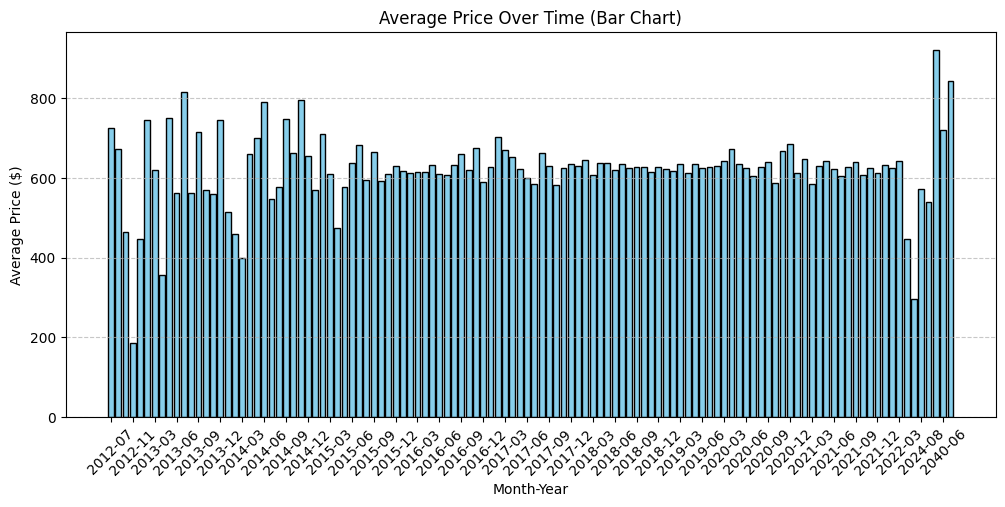

In [ ]:
# Revenue Trends Over Time
import matplotlib.pyplot as plt
import numpy as np

# Group by month and calculate average price
df['review_month'] = df['last review'].dt.to_period('M')
monthly_revenue = df.groupby('review_month')['price'].mean()

# Plot as a bar chart
plt.figure(figsize=(12, 5))
plt.bar(monthly_revenue.index.astype(str), monthly_revenue.values, color='skyblue', edgecolor='black')

# Adjust x-axis ticks to show every nth label
xticks = np.arange(0, len(monthly_revenue), step=3)  # Adjust step size based on number of months
plt.xticks(xticks, monthly_revenue.index.astype(str)[xticks], rotation=45)

plt.title("Average Price Over Time (Bar Chart)")
plt.xlabel("Month-Year")
plt.ylabel("Average Price ($)")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [ ]:
# Group by neighbourhood_group and calculate the average price
avg_price_by_neighbourhood = df.groupby('neighbourhood group')['price'].mean()

# Find the most expensive and cheapest neighbourhood groups
most_expensive = avg_price_by_neighbourhood.idxmax()
cheapest = avg_price_by_neighbourhood.idxmin()

print(f"Most Expensive Neighbourhood Group: {most_expensive} (${avg_price_by_neighbourhood.max():.2f})")
print(f"Cheapest Neighbourhood Group: {cheapest} (${avg_price_by_neighbourhood.min():.2f})")


Most Expensive Neighbourhood Group: Queens ($630.19)
Cheapest Neighbourhood Group: manhatan ($460.00)


In [ ]:
# Demand for Listings
import folium
from folium.plugins import HeatMap

# Create base map
m = folium.Map(location=[df['lat'].mean(), df['long'].mean()], zoom_start=10)

# Add heatmap layer
heat_data = df[['lat', 'long', 'availability 365']].dropna().values.tolist()
HeatMap(heat_data).add_to(m)

m  # Display map


In [ ]:
# Find top 5 hosts with most listings
top_hosts = df.groupby('host id')['calculated host listings count'].max().sort_values(ascending=False).head(5)
top_hosts

host id
6866703084     332.0
45153317531    332.0
3231719861     332.0
72619494405    332.0
62221516723    332.0
Name: calculated host listings count, dtype: float64

In [ ]:
# Percentage of Instant Bookable Listings
instant_bookable_percentage = df['instant_bookable'].value_counts(normalize=True) * 100
instant_bookable_percentage


instant_bookable
False    50.221476
True     49.778524
Name: proportion, dtype: float64

In [ ]:
# Average Price by Room Type
avg_price_by_room = df.groupby('room type')['price'].mean()
avg_price_by_room


room type
Entire home/apt    625.079552
Hotel room         668.465517
Private room       625.005069
Shared room        634.095687
Name: price, dtype: float64

<ipython-input-15-cb3c499850af>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_hosts.index, y=top_hosts.values, palette="Blues_r")


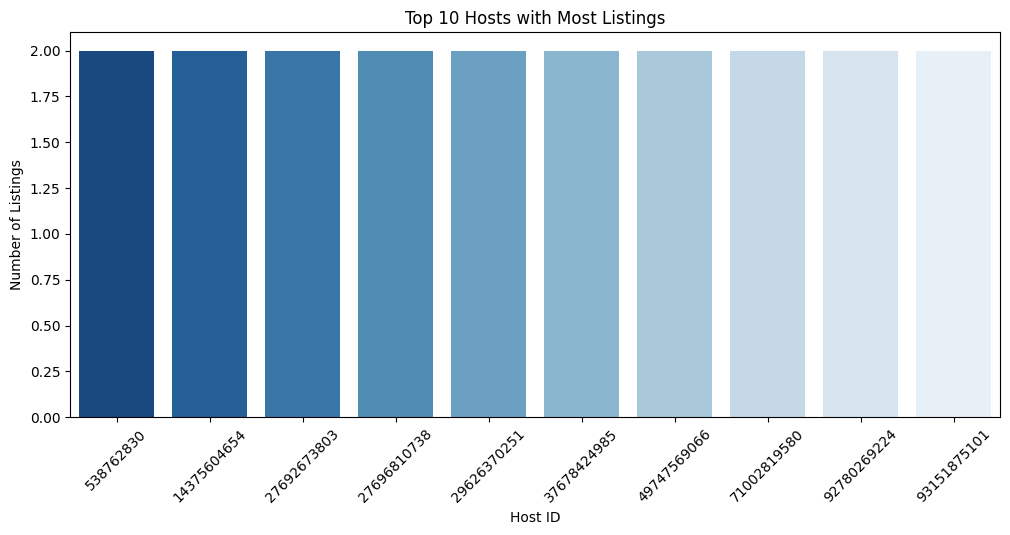

In [ ]:
top_hosts = df.groupby('host id')['id'].count().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 5))
sns.barplot(x=top_hosts.index, y=top_hosts.values, palette="Blues_r")
plt.title("Top 10 Hosts with Most Listings")
plt.xlabel("Host ID")
plt.ylabel("Number of Listings")
plt.xticks(rotation=45)
plt.show()


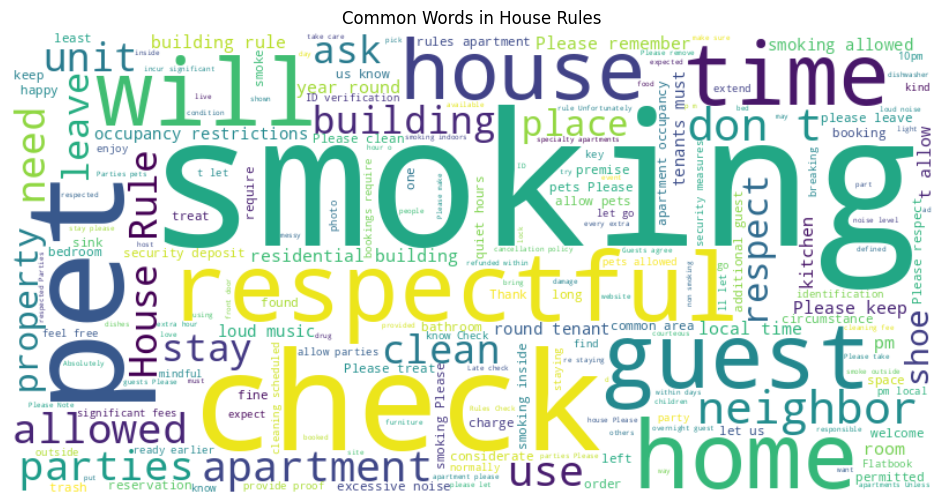

In [ ]:
# Customer Sentiment Analysis
from wordcloud import WordCloud

text = " ".join(df['house_rules'].dropna())

plt.figure(figsize=(12, 6))
wordcloud = WordCloud(background_color="white", width=800, height=400).generate(text)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Words in House Rules")
plt.show()


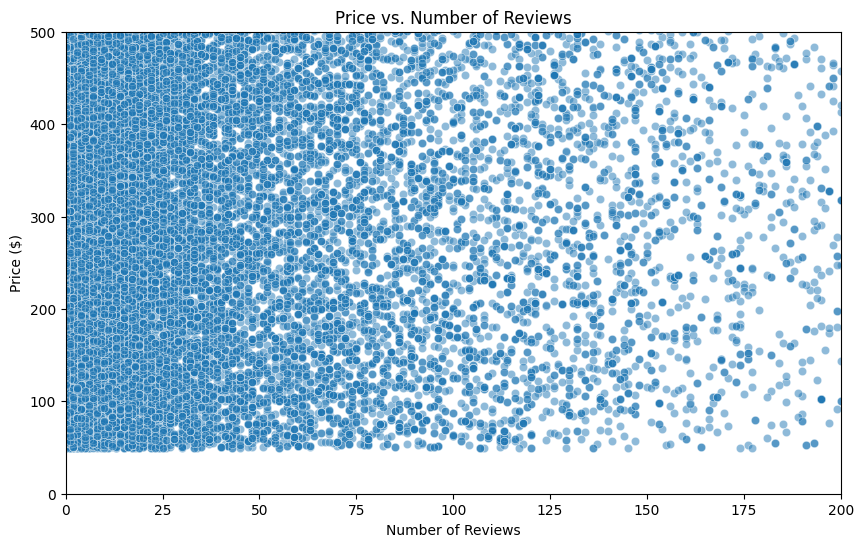

In [ ]:
#  Impact of Ratings on Bookings
plt.figure(figsize=(10, 6))
sns.scatterplot(x=df['number of reviews'], y=df['price'], alpha=0.5)
plt.title("Price vs. Number of Reviews")
plt.xlabel("Number of Reviews")
plt.ylabel("Price ($)")
plt.xlim(0, 200)  # Limit for better visualization
plt.ylim(0, 500)
plt.show()


In [ ]:
# Optimal Pricing for Maximum Bookings  Impact: Helps hosts find the best price range for higher bookings.
import pandas as pd
df['price'] = pd.to_numeric(df['price'], errors='coerce')  # Convert price to numeric
df['minimum nights'] = pd.to_numeric(df['minimum nights'], errors='coerce')

# Calculate total booking revenue per listing
df['total_revenue'] = df['price'] * df['minimum nights']

# Grouping by price ranges
price_bins = [0, 50, 100, 200, 300, 500, 1000, df['price'].max()]
df['price_range'] = pd.cut(df['price'], bins=price_bins)

# Finding average revenue per price range
price_revenue = df.groupby('price_range')['total_revenue'].mean().reset_index()
print(price_revenue.sort_values(by='total_revenue', ascending=False))


        price_range  total_revenue
6  (1000.0, 1200.0]    8969.700694
5   (500.0, 1000.0]    5953.424815
4    (300.0, 500.0]    3383.379778
3    (200.0, 300.0]    1931.164972
2    (100.0, 200.0]    1341.588115
0       (0.0, 50.0]     616.489362
1     (50.0, 100.0]     616.108114


<ipython-input-18-06e24009ac5b>:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  price_revenue = df.groupby('price_range')['total_revenue'].mean().reset_index()


In [ ]:
# Do Superhosts Earn More Than Regular Hosts?
# Checking host verification
df['host_identity_verified'] = df['host_identity_verified'].fillna('unverified')

# Compare Superhosts vs. non-superhosts
superhost_revenue = df.groupby('host_identity_verified')['total_revenue'].mean()
print(superhost_revenue)


host_identity_verified
unconfirmed    5024.444776
unverified     7444.125448
verified       5067.773247
Name: total_revenue, dtype: float64


In [ ]:
# Seasonal Booking Trends
df['last review'] = pd.to_datetime(df['last review'], errors='coerce')
df['month'] = df['last review'].dt.month

# Monthly booking trends
monthly_trends = df.groupby('month')['reviews per month'].mean()
print(monthly_trends)


month
1.0     0.785273
2.0     2.062810
3.0     1.126872
4.0     0.591374
5.0     0.866320
6.0     2.096262
7.0     2.374519
8.0     0.276383
9.0     0.324952
10.0    0.389207
11.0    0.478012
12.0    0.617796
Name: reviews per month, dtype: float64


In [ ]:
# Cleaning Fee vs. Guest Satisfaction
df['service fee'] = pd.to_numeric(df['service fee'], errors='coerce')

# Correlation between service fee & review score
cleaning_fee_correlation = df[['service fee', 'review rate number']].corr()
print(cleaning_fee_correlation)


                    service fee  review rate number
service fee            1.000000           -0.004389
review rate number    -0.004389            1.000000


In [ ]:
# Best Time of Year to Adjust Prices & Promotions

# Extract month from last review
df["review_month"] = df["last review"].dt.month

# Average price per month
seasonal_pricing = df.groupby("review_month")["price"].mean().reset_index()
print(seasonal_pricing)


    review_month       price
0            1.0  627.310809
1            2.0  626.130694
2            3.0  633.750388
3            4.0  620.310268
4            5.0  633.064941
5            6.0  624.141787
6            7.0  623.712188
7            8.0  631.723900
8            9.0  639.521560
9           10.0  610.298246
10          11.0  628.075669
11          12.0  620.896400


In [ ]:
# Which Type of Listings Perform Best?
# Compare different room types
room_type_analysis = df.groupby("room type").agg({
    "price": "mean",
    "availability 365": "mean"
}).reset_index()

print(room_type_analysis)


         room type       price  availability 365
0  Entire home/apt  625.079552        142.194130
1       Hotel room  668.465517        218.310345
2     Private room  625.005069        136.907101
3      Shared room  634.095687        171.502695


In [ ]:
#  Where Should Airbnb Expand?
# Find neighborhoods with high reviews but fewer listings
high_demand_areas = df.groupby("neighbourhood").agg({
    "id": "count",
    "reviews per month": "mean"
}).reset_index()

# Sort by high reviews per month but fewer listings
high_demand_areas = high_demand_areas[high_demand_areas["id"] < 100].sort_values(by="reviews per month", ascending=False)
print(high_demand_areas.head(10))


              neighbourhood  id  reviews per month
86                Glen Oaks   2           3.980000
104                Huguenot   9           3.674444
222                 Woodrow   3           3.660000
180             Silver Lake   9           3.453333
145          New Dorp Beach  12           3.362857
32              Castle Hill  22           3.318750
85          Gerritsen Beach   3           3.290000
35   Chelsea, Staten Island   1           3.100000
173                Rosebank  14           3.078571
215              Whitestone  26           3.040000
